#### **Spectral derivatives**

In general, we have pair of equations:

$$
F(k)=\int_{-\infty}^{\infty}e^{-ikx}f(x)dx,
$$

$$
f(x)=\frac{1}{2\pi}\int_{-\infty}^{\infty}e^{ikx}F(k)dk,
$$

and one simple rule $\widehat{f^{(n)}}=(ik)^n\widehat{f}$.

Spectral derivative in NumPy is done like this:

$$
f'(x)=\text{ifft}(ik\cdot\text{fft}(f(x)))
$$

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [60]:
L = 1
N = 100
mesh = np.linspace(0, L, N, endpoint=False) # right boundary excluded (for spectral method - periodic domain)

In [61]:
f = lambda x: np.sin(6 * np.pi * x) 
f_h = f(mesh)

f_prime = lambda x: 6 * np.pi * np.cos(6 * np.pi * x)
f_prime_h = f_prime(mesh)


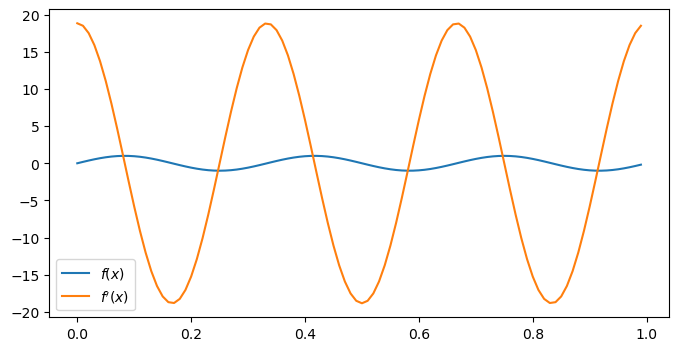

In [62]:
plt.figure(figsize=(8,4))
plt.plot(mesh, f_h, label=r"$f(x)$")
plt.plot(mesh, f_prime_h, label=r"$f'(x)$")
plt.legend()
plt.show()

In [63]:
k = np.fft.fftfreq(N, d=L/(N * 2 * np.pi))  
f_prime_h_fft = np.fft.ifft(1j * k * np.fft.fft(f_h)).real

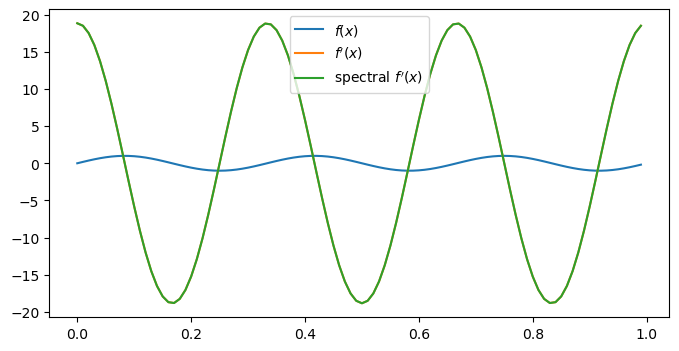

In [64]:
plt.figure(figsize=(8,4))
plt.plot(mesh, f_h, label=r"$f(x)$")
plt.plot(mesh, f_prime_h, label=r"$f'(x)$")
plt.plot(mesh, f_prime_h_fft, label=r"spectral $f'(x)$")
plt.legend()
plt.show()

---

Spectral derivative in 2D in NumPy:

$$
\nabla f(\vec{x})=\text{ifft2}(i\vec{k}\odot\text{fft2}(f(\vec{x})))
$$

In [65]:
L = 1
N = 100

mesh_1d = np.linspace(0, L, N, endpoint=False) # right boundary excluded again
X, Y = np.meshgrid(mesh_1d, mesh_1d)
mesh = np.stack((X, Y))

In [66]:
f = lambda x: np.sin(2 * np.pi * x[0]) * np.sin(4 * np.pi * x[1])
f_x0 = lambda x: 2 * np.pi * np.cos(2 * np.pi * x[0]) * np.sin(4 * np.pi * x[1])
f_x1 = lambda x: np.sin(2 * np.pi * x[0]) * 4 * np.pi * np.cos(4 * np.pi * x[1])

In [67]:
f_h = f(mesh)
f_x0_h = f_x0(mesh)
f_x1_h = f_x1(mesh)

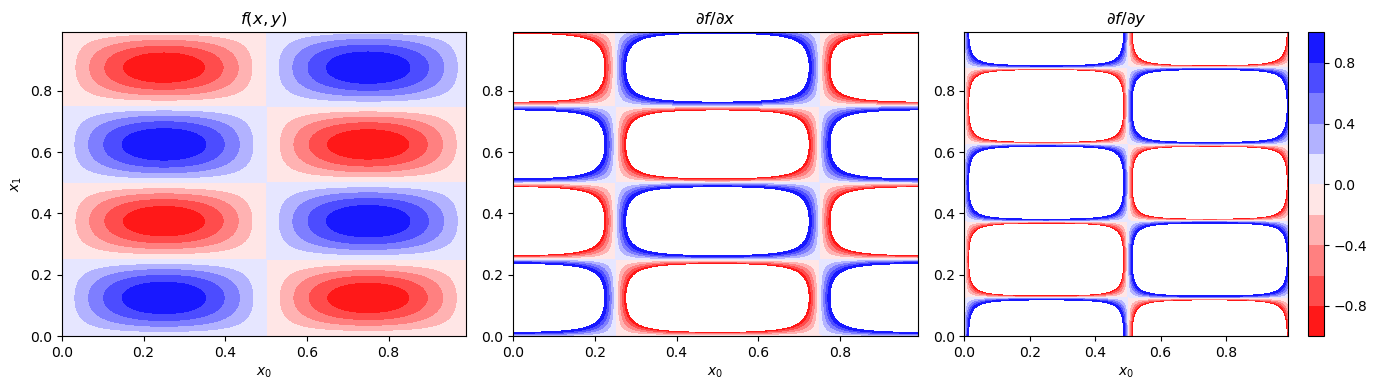

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.contourf(X, Y, f_h, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'$f(x,y)$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.subplot(132)
plt.contourf(X, Y, f_x0_h, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'$\partial f/\partial x$')
plt.xlabel(r'$x_0$')
plt.subplot(133)
plt.contourf(X, Y, f_x1_h, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.colorbar()
plt.title(r'$\partial f/\partial y$')
plt.xlabel(r'$x_0$')
plt.tight_layout()
plt.show()

In [69]:
wavenumbers_1d = np.fft.fftfreq(N, d=1/N) * 2 * np.pi / L
KX, KY = np.meshgrid(wavenumbers_1d, wavenumbers_1d)
wavenumbers = np.stack((KX, KY))

In [70]:
derivative_operator = 1j * wavenumbers # the "gradient" operator (it accumulates all partial derivatives)

In [71]:
f_x0_h_spectral = np.fft.ifft2(derivative_operator[0] * np.fft.fft2(f_h)).real
f_x1_h_spectral = np.fft.ifft2(derivative_operator[1] * np.fft.fft2(f_h)).real

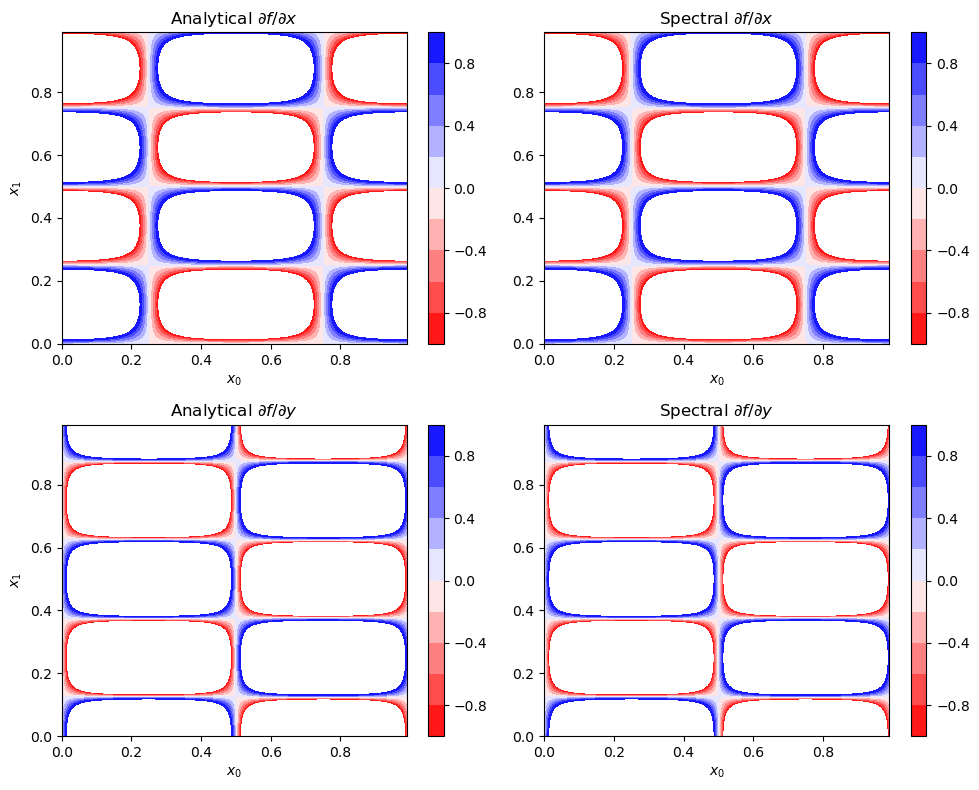

In [72]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.contourf(X, Y, f_x0_h, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'Analytical $\partial f/\partial x$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.colorbar()
plt.subplot(222)    
plt.contourf(X, Y, f_x0_h_spectral, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'Spectral $\partial f/\partial x$')
plt.xlabel(r'$x_0$')
plt.colorbar()
plt.subplot(223)
plt.contourf(X, Y, f_x1_h, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'Analytical $\partial f/\partial y$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.colorbar()
plt.subplot(224)    
plt.contourf(X, Y, f_x1_h_spectral, levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'Spectral $\partial f/\partial y$')
plt.xlabel(r'$x_0$')
plt.colorbar()
plt.tight_layout()
plt.show()

In [73]:
print("Relative error in ∂f/∂x:", np.linalg.norm(f_x0_h_spectral - f_x0_h) / np.linalg.norm(f_x0_h))
print("Relative error in ∂f/∂y:", np.linalg.norm(f_x1_h_spectral - f_x1_h) / np.linalg.norm(f_x1_h))

Relative error in ∂f/∂x: 6.685780684926603e-15
Relative error in ∂f/∂y: 6.980755289684482e-15


In [74]:
# alternative way to compute the derivative operator

grad_f_h_spectral = np.fft.ifft2(derivative_operator * np.fft.fft2(f_h)).real
grad_f_h_spectral.shape

(2, 100, 100)

IMPORTANT: If $f$ is a real-valued function, i.e., $f(\vec{x})\in\mathbb{R}$, then we can save computation

with the real-valued Fourier transform:

$$
\nabla f(\vec{x})=\text{irfft2}(i\vec{k_{\text{real}}}\odot\text{rfft2}(f(\vec{x}))).
$$

In [75]:
wavenumbers_1d_real = np.fft.rfftfreq(N, d=1/N) * 2 * np.pi / L 
wavenumbers_1d_full = np.fft.fftfreq(N, d=1/N) * 2 * np.pi / L
KX, KY = np.meshgrid(wavenumbers_1d_real, wavenumbers_1d_full)
wavenumbers = np.stack((KX, KY))
wavenumbers.shape

(2, 100, 51)

In [76]:
derivative_operator = 1j * wavenumbers
grad_f_h_spectral = np.fft.irfft2(derivative_operator * np.fft.rfft2(f_h), s=(N, N))
grad_f_h_spectral.shape

(2, 100, 100)

In [77]:
print("Relative error in ∂f/∂x:", np.linalg.norm(grad_f_h_spectral[0] - f_x0_h) / np.linalg.norm(f_x0_h))
print("Relative error in ∂f/∂y:", np.linalg.norm(grad_f_h_spectral[1] - f_x1_h) / np.linalg.norm(f_x1_h))

Relative error in ∂f/∂x: 7.99982990730389e-15
Relative error in ∂f/∂y: 7.784059124449683e-15


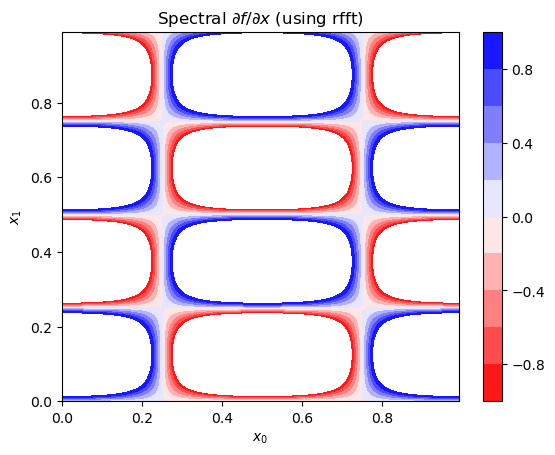

In [78]:
plt.contourf(X, Y, grad_f_h_spectral[0], levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'Spectral $\partial f/\partial x$ (using rfft)')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')        
plt.colorbar()
plt.show()

---

Spectral derivative in 3D in NumPy (`rfftn` and `irfftn` can be used too [eq. given]) is represented like:

$$ 
\nabla f (\vec{x})=\text{irfftn}(i\vec{k}_{\text{real}}\odot\text{rfftn}f(\vec{x}))
$$

In [102]:
L = 1
N = 40

In [129]:
mesh_1d = np.linspace(0, L, N, endpoint=False)
mesh = np.stack(np.meshgrid(mesh_1d, mesh_1d, mesh_1d, indexing="ij"))
mesh.shape

(3, 40, 40, 40)

In [133]:
f = lambda x: (
    np.sin(2 * np.pi * x[0] / L) *
    np.sin(4 * np.pi * x[1] / L) *
    np.cos(2 * np.pi * x[2] / L))
f_x0 = lambda x: (
    2 * np.pi / L * np.cos(2 * np.pi * x[0] / L) *
    np.sin(4 * np.pi * x[1] / L) *
    np.cos(2 * np.pi * x[2] / L))
f_x1 = lambda x: (
    np.sin(2 * np.pi * x[0] / L) *
    4 * np.pi / L * np.cos(4 * np.pi * x[1] / L) *
    np.cos(2 * np.pi * x[2] / L))
f_x2 = lambda x: (
    np.sin(2 * np.pi * x[0] / L) *
    np.sin(4 * np.pi * x[1] / L) *
    -2 * np.pi / L * np.sin(2 * np.pi * x[2] / L))

X, Y, Z = mesh

In [105]:
f_h = f(mesh)
f_x0_h = f_x0(mesh)
f_x1_h = f_x1(mesh)
f_x2_h = f_x2(mesh)
f_h.shape

(40, 40, 40)

Rendering 3D plot would be computationaly expensive, so we plot 2D slices. We'll focus on $\partial f/\partial x_i$ later.

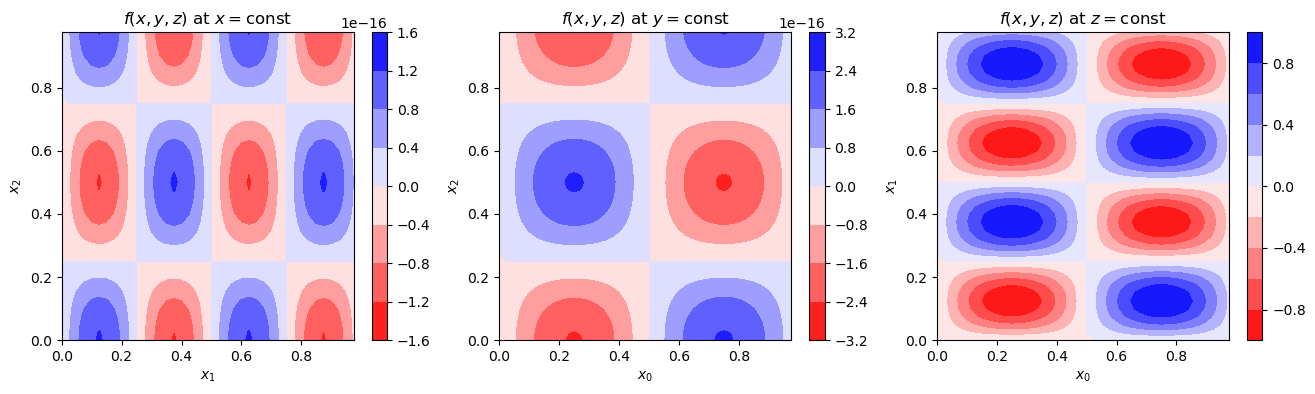

In [137]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.contourf(Y[20], Z [20], f_h[20, :, :], cmap='bwr_r')
plt.title(r'$f(x,y,z)$ at $x=\rm{const}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()
plt.subplot(132)
plt.contourf(X[:,20], Z[:,20], f_h[:, 20, :], cmap='bwr_r')
plt.title(r'$f(x,y,z)$ at $y=\rm{const}$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_2$')
plt.colorbar()
plt.subplot(133)
plt.contourf(X[:,:,20], Y[:,:,20], f_h[:, :, 20], levels=np.linspace(-1, 1, 11), cmap='bwr_r')
plt.title(r'$f(x,y,z)$ at $z=\rm{const}$')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.colorbar()
plt.show()

In [138]:
wavenumbers_1d_real = np.fft.rfftfreq(N, 1/N) * 2 * np.pi / L # this can be used only for the last dimension
wavenumbers_1d_full = np.fft.fftfreq(N, 1/N) * 2 * np.pi / L
wavenumbers = np.stack(np.meshgrid(wavenumbers_1d_full, wavenumbers_1d_full, wavenumbers_1d_full, indexing="ij"))

derivative_operator = 1j * wavenumbers
print(derivative_operator.shape)

f_x2_h_spectral = np.fft.ifftn(derivative_operator[2] * np.fft.fftn(f_h), s=(N, N, N)).real # we can use irfftn if needed

(3, 40, 40, 40)


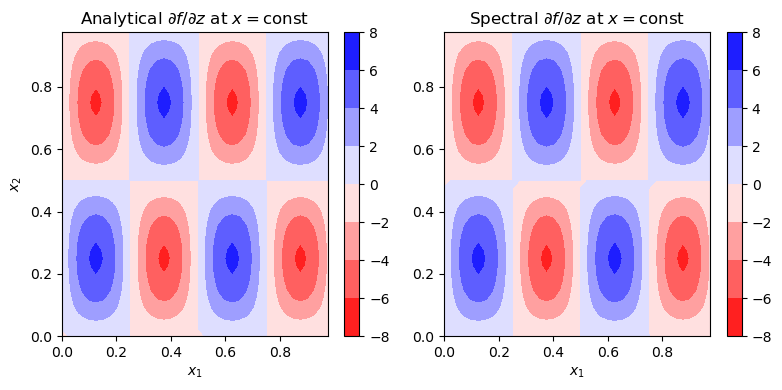

In [140]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.contourf(Y[30], Z[30], f_x2_h[30, :, :], cmap='bwr_r')
plt.title(r'Analytical $\partial f/\partial z$ at $x=\rm{const}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.colorbar()
plt.subplot(122)    
plt.contourf(Y[30], Z[30], f_x2_h_spectral[30,:, :], cmap='bwr_r')
plt.title(r'Spectral $\partial f/\partial z$ at $x=\rm{const}$')
plt.xlabel(r'$x_1$')   
plt.colorbar()
plt.tight_layout()
plt.show()  

In [127]:
print("Relative error in ∂f/∂z:", np.linalg.norm(f_x2_h_spectral - f_x2_h) / np.linalg.norm(f_x2_h))

Relative error in ∂f/∂z: 3.7028430508411106e-15
